# Absenttation at Work

# Importing data and libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("Absenteeism_at_work.csv")

# Exploratory data analysis

In [67]:
df.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [4]:
df.shape

(740, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

## As there are no missing values, so we don't need to do the data cleaning part.

In [6]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


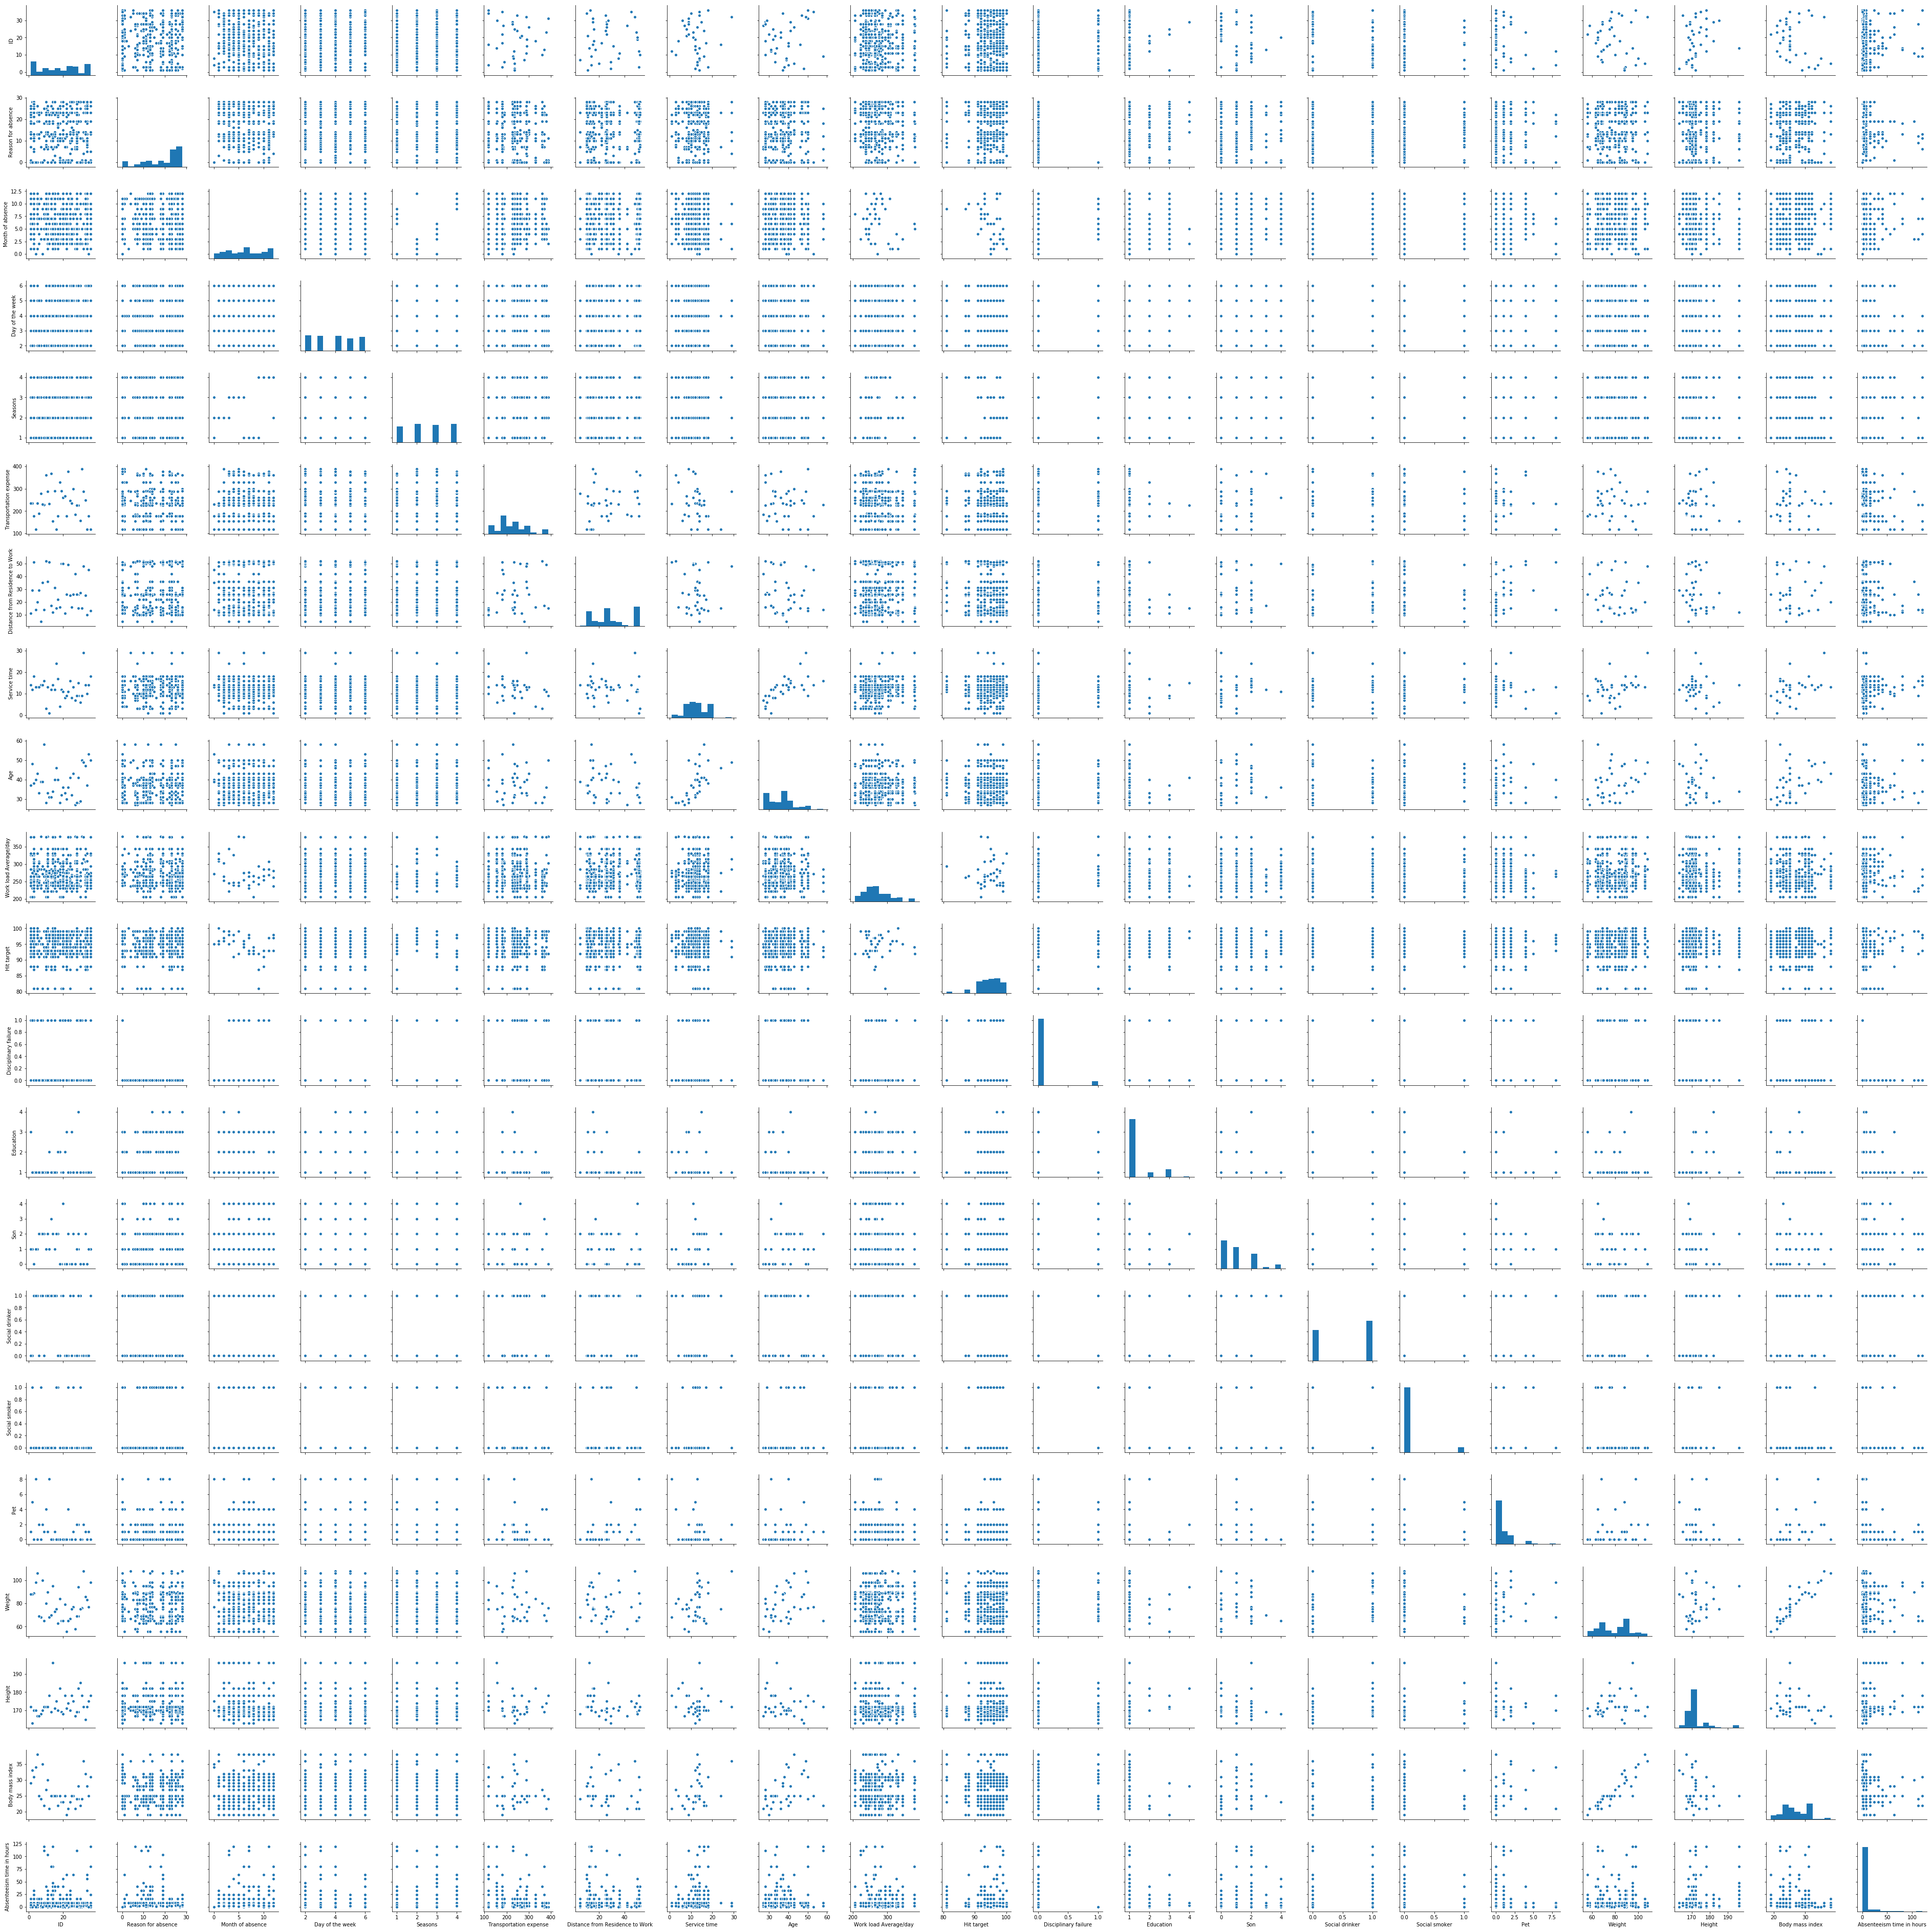

In [7]:
sns.pairplot(df)

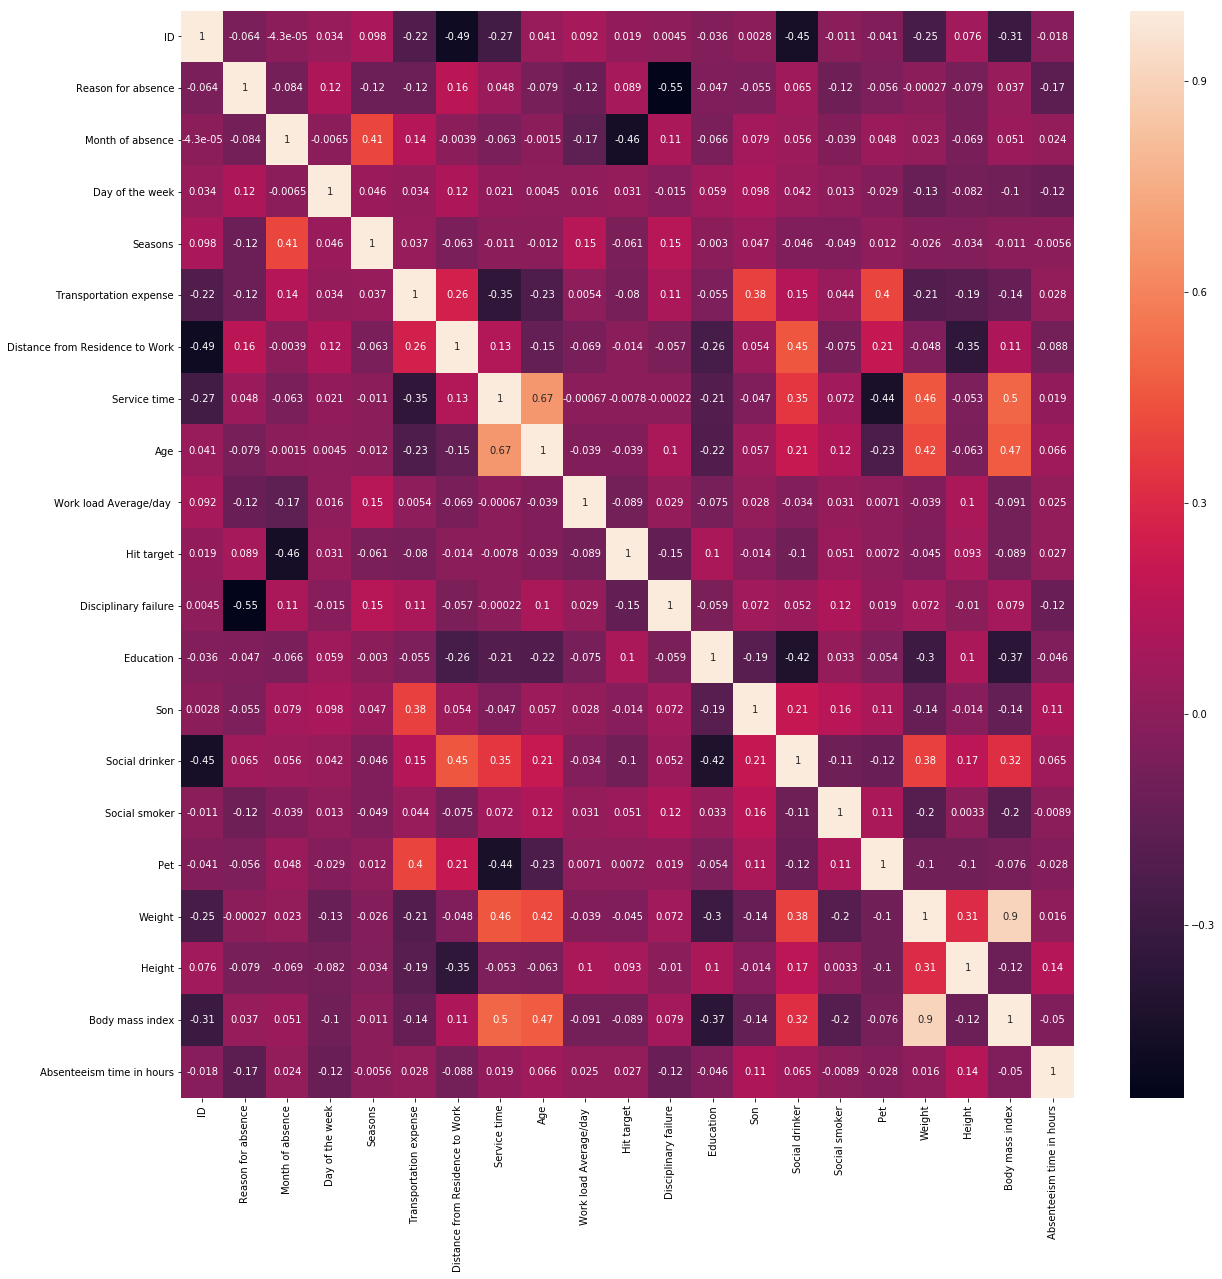

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

Text(0,0.5,'Hours')

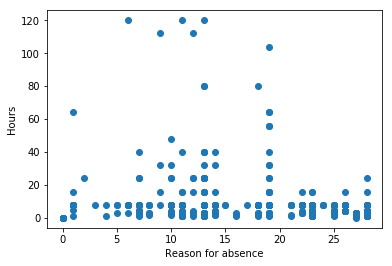

In [71]:
plt.scatter(df.iloc[:,1:2],df.iloc[:,-1:])
plt.xlabel("Reason for absence")
plt.ylabel("Hours")

# Since our input features are at different scales we need to standardize the input.

In [12]:
X = df.iloc[:,1:-1]
y= df.iloc[:,-1:]

In [13]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
X = sc.fit_transform(X)
X

array([[ 0.80493838,  0.19676258, -0.64394734, ...,  0.85167289,
        -0.01904601,  0.77593223],
       [-2.28012426,  0.19676258, -0.64394734, ...,  1.47305611,
         0.97582783,  1.00943766],
       [ 0.44896961,  0.19676258,  0.0599242 , ...,  0.77399998,
        -0.35067062,  1.00943766],
       ...,
       [-2.28012426, -1.84169773, -0.64394734, ...,  1.47305611,
        -0.35067062,  1.70995395],
       [-2.28012426, -1.84169773,  0.0599242 , ...,  1.62840192,
        -0.35067062,  1.94345938],
       [-2.28012426, -1.84169773,  1.46766727, ..., -0.15807485,
         0.47839091, -0.39159492]])

# Creating input features and target variables

In [56]:
print("Input shape",X.shape)

Input shape (740, 19)


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegressionCV

In [60]:
lo = LogisticRegressionCV(penalty = 'l2')
lo.fit(X_train,y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [61]:
y_pred = lo.predict(X_test)

# 2.KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train )

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [27]:
y_pred =  knn.predict(X_test)

# 3.SVM

In [30]:
from sklearn.svm import SVC

In [31]:
svm = SVC()
svm.fit(X_train, y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred =  svm.predict(X_test)

# Cross Validation

In [64]:
np.column_stack((y_pred, y_test))

array([[  2,   1],
       [  2,   4],
       [  8,   8],
       [  2,   2],
       [  2,   4],
       [  8,   2],
       [  2,   2],
       [  8,   5],
       [  8,   8],
       [  3,   1],
       [  0,   0],
       [  0,   0],
       [  8,   4],
       [  8,   8],
       [  0,   0],
       [  8,  24],
       [  8,   1],
       [  2,   3],
       [  8,   8],
       [  8,   4],
       [  8,   3],
       [  8,   1],
       [  2,   8],
       [  0,   0],
       [  2,   2],
       [  8,   3],
       [  8,   1],
       [  2,   2],
       [  2,   2],
       [  8,   8],
       [  8,   8],
       [  8,   3],
       [  8,   8],
       [  2,   3],
       [  8,   1],
       [  2,   3],
       [  8,   8],
       [  8,   2],
       [  2,   8],
       [  8,   8],
       [  8,   3],
       [  8,   8],
       [  8,   2],
       [  2,   2],
       [  2,   2],
       [  2,   2],
       [  8,   8],
       [  8,   8],
       [  8,   3],
       [  2,   1],
       [  2,   2],
       [  8,  16],
       [  8,

In [51]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print ('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred) ) 
print ('Accuracy Score :')
print(accuracy_score(y_test, y_pred) )
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  1  0  0 11  0  0  0  0  0  0  0]
 [ 0  0 39  2  0  0 10  0  0  0  0  0  0  0]
 [ 0  0 15  1  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0 12  1  0  0 48  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]]
Accuracy Score :
0.45495495495495497
Report : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.00      0.00      0.00        26
          2       0.43      0.76      0.55        51
          3       0.20      0.03      0.05        32
          4       0.00      0.00     

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 4.Nural netwrok

In [36]:
from keras import Sequential
from keras.layers import Dense

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=19))
#Second  Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [38]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [39]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
518/518 [==============================] - 14s 27ms/step - loss: 0.4255 - acc: 0.1158
Epoch 2/100
518/518 [==============================] - 1s 1ms/step - loss: -0.5229 - acc: 0.1197A: 0s - loss: 0.
Epoch 3/100
518/518 [==============================] - 1s 1ms/step - loss: -3.0439 - acc: 0.1197
Epoch 4/100
518/518 [==============================] - 1s 1ms/step - loss: -8.1832 - acc: 0.1197
Epoch 5/100
518/518 [==============================] - 1s 1ms/step - loss: -17.2619 - acc: 0.1197
Epoch 6/100
518/518 [==============================] - 1s 1ms/step - loss: -31.3783 - acc: 0.1197
Epoch 7/100
518/518 [==============================] - 1s 1ms/step - loss: -51.3659 - acc: 0.1197
Epoch 8/100
518/518 [==============================] - 1s 2ms/step - loss: -70.0921 - acc: 0.1197
Epoch 9/100
518/518 [==============================] - 1s 1ms/step - loss: -78.9483 - acc: 0.1197
Epoch 10/100
518/518 [==============================] - 1s 1ms/step - loss: -83.9213 - acc: 0.1197
Epoch 

518/518 [==============================] - 0s 572us/step - loss: -94.8695 - acc: 0.1718
Epoch 83/100
518/518 [==============================] - 0s 485us/step - loss: -94.8706 - acc: 0.1718
Epoch 84/100
518/518 [==============================] - 0s 528us/step - loss: -94.8716 - acc: 0.1718
Epoch 85/100
518/518 [==============================] - 0s 787us/step - loss: -94.8723 - acc: 0.1718
Epoch 86/100
518/518 [==============================] - 0s 778us/step - loss: -94.8732 - acc: 0.1718
Epoch 87/100
518/518 [==============================] - 0s 780us/step - loss: -94.8739 - acc: 0.1718
Epoch 88/100
518/518 [==============================] - 0s 807us/step - loss: -94.8746 - acc: 0.1718
Epoch 89/100
518/518 [==============================] - 0s 774us/step - loss: -94.8749 - acc: 0.1718
Epoch 90/100
518/518 [==============================] - 0s 795us/step - loss: -94.8752 - acc: 0.1718
Epoch 91/100
518/518 [==============================] - 0s 801us/step - loss: -94.8757 - acc: 0.1718
Epo

In [40]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

518/518 [==============================] - 0s 256us/step


[-94.87909106398182, 0.1718146718146718]

In [42]:
y_pred=classifier.predict(X_test)
